### $CO_2$ 数据

In [1]:
%pylab inline
import urllib
from pylab import *
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
#支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


从 `noaa.gov` 下载 $CO_2$ 相关数据:

In [2]:
open("co2_mm_mlo.txt", "wb").write(urllib.request.urlopen("ftp://ftp.cmdl.noaa.gov/ccg/co2/trends/co2_mm_mlo.txt").read())

In [3]:
D = loadtxt("co2_mm_mlo.txt")
years = D[:, 2]
average = D[:, 3]
interpolated = D[:, 4]
trend = D[:, 5]

绘图并计算拟合线

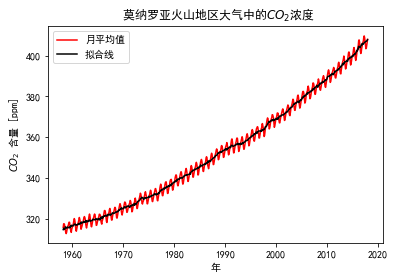

In [4]:
plot(years, interpolated, "r-", lw=1.5, label="月平均值")
plot(years, trend, "k-", label="拟合线")
xlabel("年")
ylabel("$CO_2$ 含量 [ppm]")
title(" 莫纳罗亚火山地区大气中的$CO_2$浓度 ")
legend(loc="upper left");

### 从Y周读取2010年和1980年的二氧化碳数据

In [5]:
idx1980 = sum(years < 1980)
idx2010 = sum(years < 2010)
N0 = trend[idx1980]
N  = trend[idx2010]
print("N0 = %.2f ppm  (year %.3f)" % (N0, years[idx1980]))
print("N  = %.2f ppm  (year %.3f)" % (N,  years[idx2010]))

N0 = 338.09 ppm  (year 1980.042)
N  = 388.41 ppm  (year 2010.042)


### 计算温度变化

从另一程序中测算

In [ ]:
dTdt = 0.24995728742972512

计算30年的变化

In [8]:
dT = dTdt * 3 # 3 decades
dT

0.7498718622891754

### 计算出预估温度

In [9]:
from math import log
deltaT = dT * log(2) / log(1.0*N/N0)
print("∆T = ", deltaT, "C")

∆T =  3.7461189203033207 C
